In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
bitcoin = pd.read_csv('bitcoin_2017_to_2023.csv', index_col='timestamp', parse_dates=True)

In [5]:
bitcoin.index

DatetimeIndex(['2023-08-01 13:19:00', '2023-08-01 13:18:00',
               '2023-08-01 13:17:00', '2023-08-01 13:16:00',
               '2023-08-01 13:15:00', '2023-08-01 13:14:00',
               '2023-08-01 13:13:00', '2023-08-01 13:12:00',
               '2023-08-01 13:11:00', '2023-08-01 13:10:00',
               ...
               '2017-08-17 04:09:00', '2017-08-17 04:08:00',
               '2017-08-17 04:07:00', '2017-08-17 04:06:00',
               '2017-08-17 04:05:00', '2017-08-17 04:04:00',
               '2017-08-17 04:03:00', '2017-08-17 04:02:00',
               '2017-08-17 04:01:00', '2017-08-17 04:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=3126000, freq=None)

In [6]:
bitcoin.columns

Index(['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
       'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')

<Axes: xlabel='timestamp'>

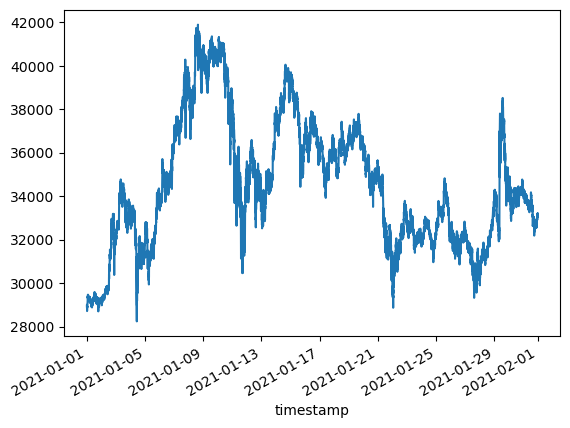

In [7]:
bitcoin.loc['2021-01', 'open'].plot()  # Filtre par l'année 2021 sur la colonne 'open'


<Axes: xlabel='timestamp'>

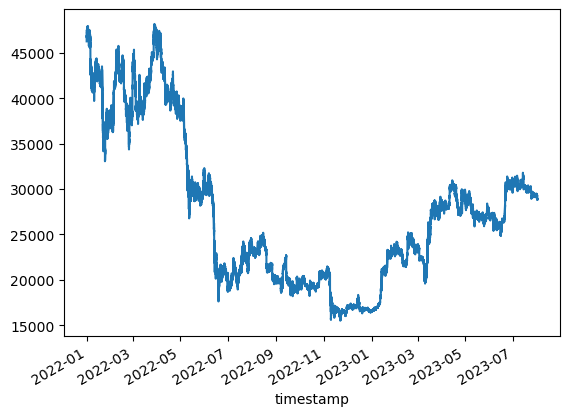

In [8]:
# Trier les dates dans l'ordre croissant
bitcoin = bitcoin.sort_index(ascending=True)

# Maintenant, essayez de tracer la plage de dates
bitcoin.loc['2022':'2023', 'close'].plot()


# Resample

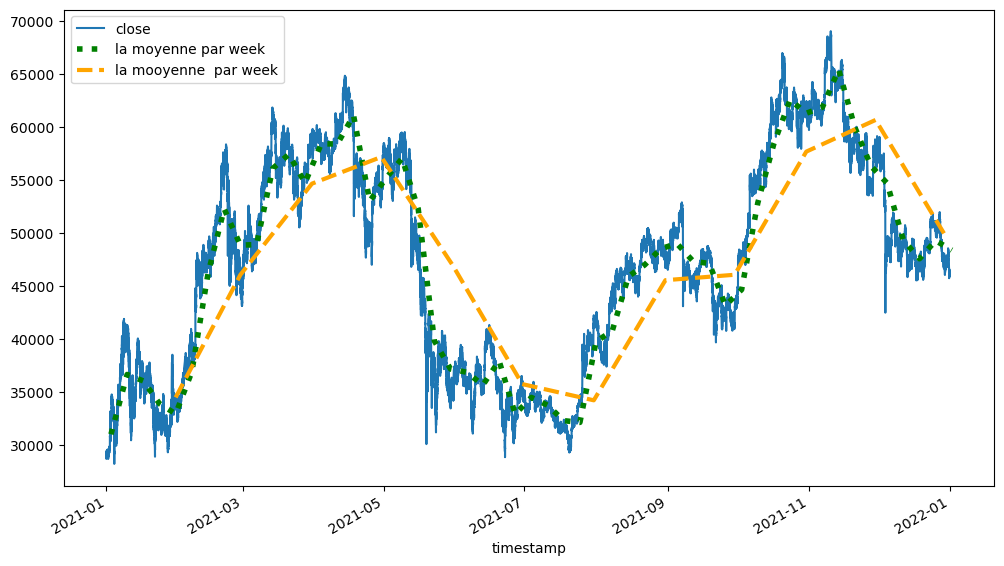

In [9]:
plt.figure(figsize=(12,7))
bitcoin.loc['2021','close'].plot()
bitcoin.loc['2021','close'].resample('W').mean().plot(label='la moyenne par week',ls=':',lw=4 , c='green')
bitcoin.loc['2021','close'].resample('M').mean().plot(label='la mooyenne  par week',ls='--', lw=3, c='orange')
plt.legend()
plt.show()




# Aggregate

In [ ]:

m = bitcoin['close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
m['mean']['2021'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

# Rolling et EWM:
## rolling() : 
Utilise cette méthode quand tu veux une fenêtre fixe de taille donnée (ex. 7 jours) où chaque valeur a le même poids. C'est plus simple et adapté aux analyses générales.
## ewm() : 
Utilise cette méthode quand tu veux un lissage où les valeurs récentes sont plus importantes. C'est mieux quand tu veux réagir plus vite aux changements récents ou pour des analyses où la mémoire des événements anciens doit être réduite au fil du temps.
## Lissage : 
permet de mieux comprendre le comportement global des données sans être perturbé par les petites fluctuations aléatoires.

<Axes: xlabel='timestamp'>

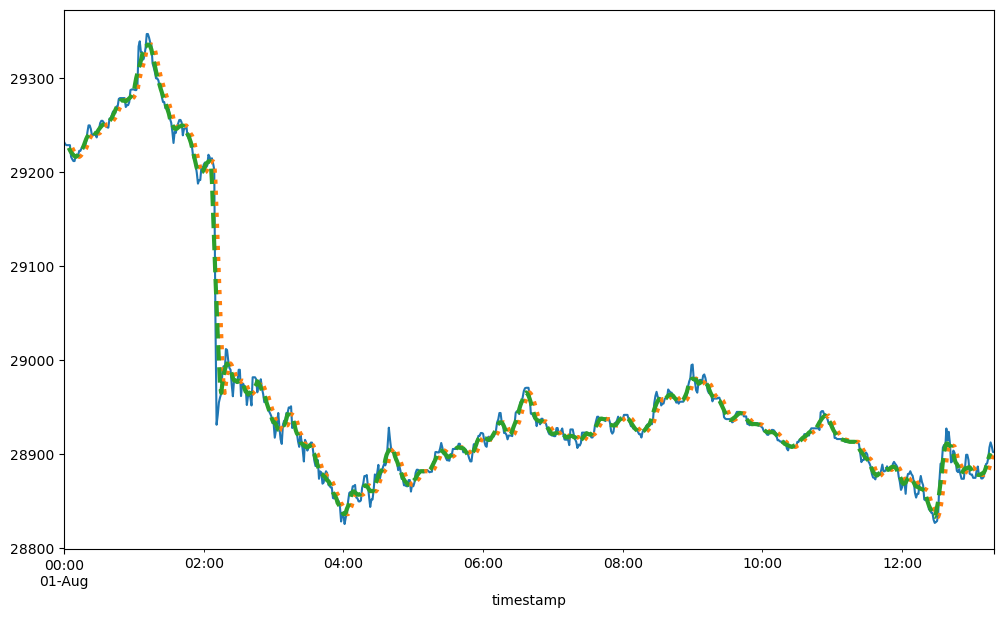

In [11]:
plt.figure(figsize=(12,7))

# Plotting the high values for August 2023
bitcoin.loc['2023-08', 'high'].plot()

# Rolling mean with window of 8 days
bitcoin.loc['2023-08', 'high'].rolling(window=8).mean().plot(label='la moyenne dans une fenetre de 8j', ls=':', lw=3)

# Centered rolling mean with window of 8 days
bitcoin.loc['2023-08', 'high'].rolling(window=8, center=True).mean().plot(label='la moyenne dans une fenetre de 8j centree', ls='--', lw=3)

# Exponential weighted moving average
bitcoin.loc['2023-08', 'high'].ewm(alpha=0.5).mean().plot(label='ewm', ls='-.', lw=.01)


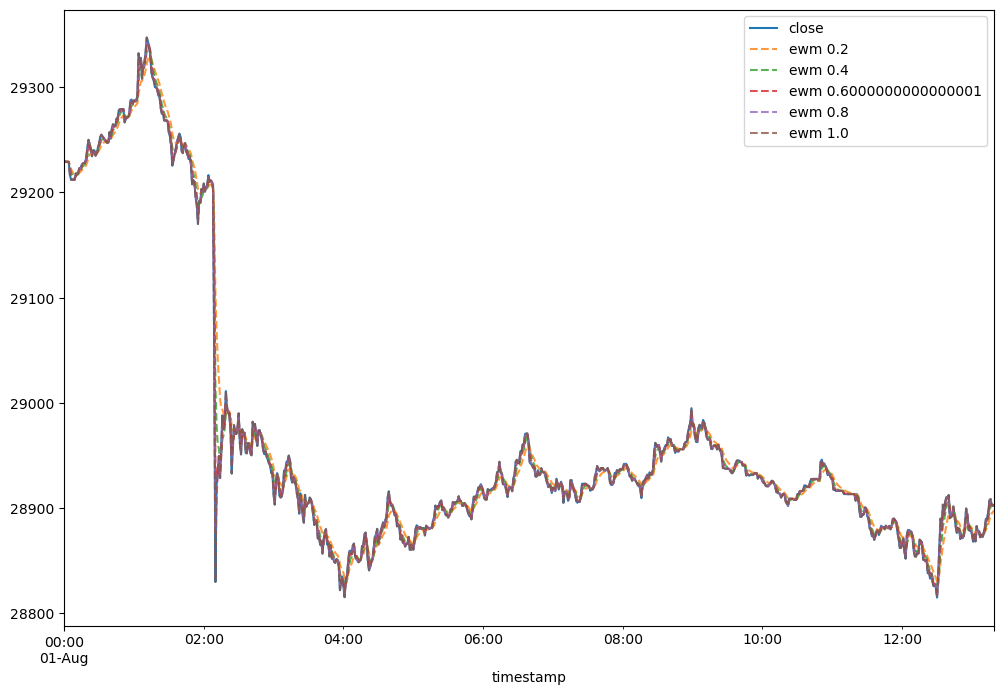

In [12]:
import numpy as np

plt.figure(figsize=(12, 8))
bitcoin.loc['2023-08', 'close'].plot()

# Loop over float values using np.arange
for i in np.arange(0.2, 1.2, 0.2):  # Adjusted to 1.2 to include 1
    bitcoin.loc['2023-08', 'close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)

plt.legend()


# Merge et join



In [13]:
etherum = pd.read_csv('ETH-USD.csv',index_col='Date', parse_dates=True)

In [14]:
etherum.columns = etherum.columns.str.lower()
etherum.columns


Index(['open', 'high', 'low', 'close', 'adj close', 'volume'], dtype='object')

In [24]:
# change le type d'index
bitcoin.index = bitcoin.index.normalize()

Index(['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
       'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')

In [22]:
bitcoin.index = bitcoin.rename(columns={'timestamp': 'Date'})
bitcoin.index.name

'timestamp'

In [ ]:
bitcoin = bitcoin.rename(columns={'timestamp': 'Date'})

# Assurez-vous que les colonnes 'Date' sont au format date dans les deux DataFrames
bitcoin['Date'] = pd.to_datetime(bitcoin['Date']).dt.date
etherum['Date'] = pd.to_datetime(etherum['Date']).dt.date

# Fusionnez les deux DataFrames sur la colonne 'Date'
btc_eth = pd.merge(bitcoin, etherum, on='Date', how='inner', suffixes=('_btc', '_eth'))


In [ ]:
btc_eth['close_eth']

In [ ]:
btc_eth.index.dtype

In [ ]:
# Convertir l'index en datetime
btc_eth.index = pd.to_datetime(btc_eth.index)

# Vérifier que la conversion a été effectuée
print("Type de l'index après conversion :", btc_eth.index.dtype)

# Tracer les cours de clôture pour bitcoin et ethereum pour l'année 2019
btc_eth.loc['2022-03', ['close_btc', 'close_eth']].plot(subplots=True, figsize=(12, 8))
plt.show()


In [ ]:
btc_eth[['close_btc','close_eth']].corr()